
# Project: Investigate FBI Gun Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will conduct exploratory data analysis of gun purchases across 50 states of the United States in 2016. I will use two data set "gun data" and census data set. Since both data sets have issues such as incorrect data types, missing values, containing missing characters as well as incorrectly parsed data, I will conduct data cleansing first. 

With the gun data set, I will ask the following questions:
<ol>
    
<li> Which state(s) have the highest number of total gun purchases in the USA in 2016? </li>
<li> Which state(s) have the most fast-growing gun purchases from the beginning to the end of 2016? </li>

</ol>

<ol>
With the census data set, I will examine each ethnicity-related variables, such as 'White only percent', 'Black only percent', etc and answer the following questions:

<li> What do the frequency distributions of the above-mentioned variables look like? </li>
<li> What are the dispersions as well as central tendencies of those variables? </li>
    
</ol>

<ol>

when I augment the gun data set with the census data set, there are more demographic data such as population, age, ethnicity which can help understanding the factors that corelate with gun purchases. I will answer questions such as belows, but not limited to:

<li> Is age makeup of a population correlated with the number of gun purchases? </li>
<li> Is the ethnic makeup of a population correlated with the number of gun purchases? </li>
    
</ol>

#### Import Libraries for Data Analysis

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

#### Import The First Data Set - Gun data

In [123]:
# Load the first data set in excel format

gun_data = pd.read_excel('C:\\Users\\Minh Hang\\Downloads\\gun-data.xlsx')

#view the first 10 rows of the data set
gun_data.head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


#### Deal with missing data

In [124]:
#View general properties of the gun_data dataframe (e.g. the number of columns, rows, missing data)

gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

Since the data set contains a lot of Null values, attempts to convert data types may not be successful. Therefore, I will tkae this step after Null values have been treated

In [125]:
#Find out the counts of Nulls per variable and sort them in a descending order

null_counts = gun_data.isnull().sum().sort_values(ascending=False)

#Percentage of Null values in the data set
percent_null = null_counts*100/len(gun_data)

#Creating a table showing the total number of missing data and percentage of missing data:

missing_gun_data = pd.concat([null_counts, percent_null], axis = 1, keys = ['Total Missing', 'Percent Missing'])

print(missing_gun_data)

                           Total Missing  Percent Missing
rentals_long_gun                   11660        93.392070
rentals_handgun                    11495        92.070485
permit_recheck                     11385        91.189427
returned_other                     10670        85.462555
returned_long_gun                  10340        82.819383
returned_handgun                   10285        82.378855
return_to_seller_other             10230        81.938326
return_to_seller_handgun           10010        80.176211
private_sale_other                  9735        77.973568
return_to_seller_long_gun           9735        77.973568
private_sale_long_gun               9735        77.973568
private_sale_handgun                9735        77.973568
redemption_other                    7370        59.030837
prepawn_other                       7370        59.030837
other                               6985        55.947137
prepawn_long_gun                    1945        15.578694
prepawn_handgu

From the table with missing data above, some variables contain so many missing variables to the extent that it is impossible to make an analysis based on them (e.g. rentails_long_gun at 93.39% missing variables). I will set up a threshold to drop variables that have more than 60% missing variables)

In [126]:
#drop variables that have more than 60% of missing variables
thresh = len(gun_data)*.6

gun_data.dropna(thresh = thresh, axis = 1, inplace = True)

gun_data.head()

,month,state,permit,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals
0,2017-09,Alabama,16717.0,5734.0,6320.0,317,0.0,15.0,21.0,1378.0,1262.0,32019
1,2017-09,Alaska,209.0,2320.0,2930.0,160,0.0,5.0,2.0,200.0,154.0,6303
2,2017-09,Arizona,5069.0,11063.0,7946.0,631,0.0,13.0,6.0,1474.0,748.0,28394
3,2017-09,Arkansas,2935.0,4347.0,6063.0,366,51.0,12.0,13.0,1296.0,1824.0,17747
4,2017-09,California,57839.0,37165.0,24581.0,0,0.0,0.0,0.0,535.0,397.0,123506


After dropping those variables, there are 12 columns left. All variables for rentals, private, returns have been dropped. With those variables dropped, our analysis will not be able to cover all gun usages in the US.

Get a basic summary of the new data frame

In [127]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                12485 non-null  object 
 1   state                12485 non-null  object 
 2   permit               12461 non-null  float64
 3   handgun              12465 non-null  float64
 4   long_gun             12466 non-null  float64
 5   multiple             12485 non-null  int64  
 6   admin                12462 non-null  float64
 7   prepawn_handgun      10542 non-null  float64
 8   prepawn_long_gun     10540 non-null  float64
 9   redemption_handgun   10545 non-null  float64
 10  redemption_long_gun  10544 non-null  float64
 11  totals               12485 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.1+ MB


It can be seen that there are still some Null values among most of variables. For those Null values, I will either drop rows that contain Null values or impute missing values with either means or median

In [128]:
#view basic statistics of the data set

gun_data.describe()

,permit,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals
count,12461.000000,12465.000000,12466.000000,12485.000000,12462.000000,10542.000000,10540.000000,10545.000000,10544.000000,12485.000000
mean,6413.629404,5940.881107,7810.847585,268.603364,58.898090,4.828021,7.834156,407.970413,599.332417,21595.725911
std,23752.338269,8618.584060,9309.846140,783.185073,604.814818,10.907756,16.468028,783.467053,952.144809,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,865.000000,2078.250000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,3059.000000,5122.000000,125.000000,0.000000,0.000000,1.000000,39.000000,175.000000,12399.000000
75%,4272.000000,7280.000000,10380.750000,301.000000,0.000000,5.000000,8.000000,561.000000,872.000000,25453.000000
max,522188.000000,107224.000000,108058.000000,38907.000000,28083.000000,164.000000,269.000000,10046.000000,8831.000000,541978.000000


Since the the 50 percentile values for all variables above are smaller than mean values, it can be inferred that the distributions of all variables above are right-skewed. In such case, imputing with median would be more ideal than imputing with mean. I will go ahead and impute missing data with median.

In [129]:
#Impute missing data with median

gun_data.fillna(gun_data.median(), inplace = True)

In [130]:
#view the data set info

gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                12485 non-null  object 
 1   state                12485 non-null  object 
 2   permit               12485 non-null  float64
 3   handgun              12485 non-null  float64
 4   long_gun             12485 non-null  float64
 5   multiple             12485 non-null  int64  
 6   admin                12485 non-null  float64
 7   prepawn_handgun      12485 non-null  float64
 8   prepawn_long_gun     12485 non-null  float64
 9   redemption_handgun   12485 non-null  float64
 10  redemption_long_gun  12485 non-null  float64
 11  totals               12485 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.1+ MB


#### Convert data types

In [11]:
#get all columns in the data frame

gun_data.columns.to_list()

['month',
 'state',
 'permit',
 'handgun',
 'long_gun',
 'multiple',
 'admin',
 'prepawn_handgun',
 'prepawn_long_gun',
 'redemption_handgun',
 'redemption_long_gun',
 'totals']

In [12]:
#convert all variables except for 'month' and 'state' into 'int64' because values such as handgun or long_gun should be expressed as a whole number (count)

gun_cols_to_int = ['permit',
 'handgun',
 'long_gun',
 'multiple',
 'admin',
 'prepawn_handgun',
 'prepawn_long_gun',
 'redemption_handgun',
 'redemption_long_gun',
 'totals']
gun_data[gun_cols_to_int] = gun_data[gun_cols_to_int].astype(int)

In [13]:
# Convert data types in 'month' column from object to datetime

gun_data['month'] = pd.to_datetime(gun_data['month'])

#Check if 'month' column's data type has been converted to 'datetime64'
gun_data.dtypes

month                  datetime64[ns]
state                          object
permit                          int32
handgun                         int32
long_gun                        int32
multiple                        int32
admin                           int32
prepawn_handgun                 int32
prepawn_long_gun                int32
redemption_handgun              int32
redemption_long_gun             int32
totals                          int32
dtype: object

#### Keep only rows with 2016 in the gun_data set

To merge with <a href = '#census_data'>Census_data</a> set which contains data for the year 2016, I will keep only rows corresponding to year 2016. I will explain why I limit the scope of the analysis to only year 2016 <a href = '#why_2016'>later</a> in this notebook. 

In [14]:
#filter out rows corresponding to the year 2016
gun_2016 = gun_data[gun_data.month.dt.year == 2016]

#### Augment the gun_2016 data set with State abbreviation

This would help with creating a choropleth of gun data across different states of the US.

In [15]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [16]:
#Map State abbreviations with state names: 

gun_2016['Abbreviation'] = gun_2016['state'].map(us_state_abbrev)

<ipython-input-16-7257f6221f7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gun_2016['Abbreviation'] = gun_2016['state'].map(us_state_abbrev)


#### Import the second data set 

<a id='#census_data'></a>

In [17]:
#load the second data set
census_data = pd.read_csv('C:\\Users\\Minh Hang\\Downloads\\u.s.-census-data.csv')

#Check the shape of the dataframe
print('number of rows and columns are: {}'.format(census_data.shape))

census_data.tail(30)

number of rows and columns are: (85, 52)


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
55,"All firms, 2012",NaN,"374,153","68,032","499,926","231,959","3,548,449","547,352","326,693","73,418",...,81314,550453,"2,356,748","251,419","75,827","653,193","541,522","114,435","432,980","62,427"
56,"Men-owned firms, 2012",NaN,"203,604","35,402","245,243","123,158","1,852,580","284,554","187,845","38,328",...,42418,302249,"1,251,696","132,163","41,270","353,012","262,650","63,112","236,252","30,039"
57,"Women-owned firms, 2012",NaN,"137,630","22,141","182,425","75,962","1,320,085","194,508","106,678","23,964",...,23722,195694,"866,678","76,269","23,417","236,290","187,677","39,065","133,859","19,344"
58,"Minority-owned firms, 2012",NaN,"92,219","13,688","135,313","35,982","1,619,857","85,849","56,113","14,440",...,4101,105234,"1,070,392","24,423","2,354","185,043","92,807","5,777","40,507","4,077"
59,"Nonminority-owned firms, 2012",NaN,"272,651","51,147","344,981","189,029","1,819,107","442,365","259,614","54,782",...,74228,434025,"1,224,845","218,826","70,491","450,109","426,697","104,785","379,934","55,397"
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""


#### Clean The Data Set, Drop Unneeded Columns, and Treat Null Values


<ul>

<li> Drop the 'Fact Note' column since most data is neither NaN or incomprehensible </li>
<li> Drop rows containing NaN values since NaN in index from 64 to 84 across all columns/variables. Note that row 64 doesn't contain Null values however since FIPS Code is 'string' data that is unique to each state and not so useful in our analysis. </li>

</ul>

In [18]:
#Drop 'Fact Note' column

census_data.drop(census_data.columns[1], axis = 1, inplace=True)

#Drop rows containing NaN values since NaN in index from 64 to 84 across all columns/variables. 
census_data.drop(census_data.index[64:85], axis=0, inplace=True)

#view the bottom 30 records of the data frame
census_data.tail()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
59,"Nonminority-owned firms, 2012","272,651","51,147","344,981","189,029","1,819,107","442,365","259,614","54,782","1,121,749",...,74228,434025,"1,224,845","218,826","70,491","450,109","426,697","104,785","379,934","55,397"
60,"Veteran-owned firms, 2012","41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010","50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"


#### Extract the year or time information and store in a new column called 'Year'

In [19]:
#Add a new column and assign it to "None" value. We will add later. 1 is the location to insert the column

census_data.insert(1, 'Year', None)

In [20]:
#Extracting the year using 'Reguar Expression'
census_data['Year'] = census_data['Fact'].str.extract(r"(\d{4})")
                                            

In [21]:
#view the dataframe to check if the change has been reflected
census_data.head()

,Fact,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",2016,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",2010,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",2010,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",2010,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",2016,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


#### View all elements in the column 'Fact'

In [22]:
census_data.Fact.tolist()

['Population estimates, July 1, 2016,  (V2016)',
 'Population estimates base, April 1, 2010,  (V2016)',
 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
 'Population, Census, April 1, 2010',
 'Persons under 5 years, percent, July 1, 2016,  (V2016)',
 'Persons under 5 years, percent, April 1, 2010',
 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 'Persons under 18 years, percent, April 1, 2010',
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 'Persons 65 years and over, percent, April 1, 2010',
 'Female persons, percent,  July 1, 2016,  (V2016)',
 'Female persons, percent, April 1, 2010',
 'White alone, percent, July 1, 2016,  (V2016)',
 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 'Asian alone, percent, July 1, 2016,  (V2016)',
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
 'Tw

#### Determining the scope of the analysis - to limit to the year 2016

<a id='why_2016'></a>

The information in the 'Fact' column resemble variables as they can be used as factors that may impact the overall gun purchases situation in the US. I would like to reshape the values in the 'Fact' column to become the labels of new columns and turn state names into indexes for rows.

In term of 'Fact' in the census_data, different facts are recorded in different years (e.g Population estimates, July 1, 2016,  (V2016)' vs 'Population per square mile, 2010') but none of a given fact are recorded across multiple years to allow for a meaningful time series analysis. Therefore I will limit the 'Year' to only 2016 as I think there are various variables recorded in 2016 such as population size, age, and ethnicity that may be relevant to understanding what's corelated with gun purchases.

Other time period, such as 2012, have variables that I don't think are relevant such as firm types (men-owned, women-owned, etc), healthcare receipts, accommodation food and sales. Therefore, I won't pursue this year.

#### Filter only year 2016

It is important to assume that the census observations in **2016 were recorded in July** so it is not a gross total fugures for the whole 2016.

In [23]:
census_july_2016 = census_data[census_data.Year == '2016']

#### Transpose the DataFrame

Transpose to merge with the gun_data using State as the shared index

In [24]:
census_july_2016 = census_july_2016.set_index('Fact').T

Drop row '2016' since all variables now are based in 2016

In [25]:
census_july_2016 = census_july_2016.drop(index = 'Year')

In [26]:
census_july_2016.head(3)

Fact,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Building permits, 2016"
Alabama,"4,863,300",6.00%,22.60%,16.10%,51.60%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"2,230,185","15,001"
Alaska,"741,894",7.30%,25.20%,10.40%,47.70%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"310,658","1,503"
Arizona,"6,931,071",6.30%,23.50%,16.90%,50.30%,83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%,"2,961,003","35,578"


#### Cleaning unwanted characters such as ',', '%', '$', \

In [27]:
#define a function that removes unwanted characters from a particular string

def clean_bad_char(incoming_string):
    cleaned_string = incoming_string.replace('%', '').replace(',', '').replace('$','').replace('\"', '')
    return(cleaned_string)


In [28]:
#apply the above function to the dataframe

census_july_2016 = census_july_2016.applymap(clean_bad_char)

In [29]:
#check if the change has been successfully shown

census_july_2016.tail()

Fact,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Building permits, 2016"
Virginia,8411808,6.10,22.20,14.60,50.80,70.00,19.80,0.50,6.60,0.10,2.90,9.10,62.40,3491054,31132
Washington,7288000,6.20,22.40,14.80,50.00,80.00,4.10,1.90,8.60,0.80,4.60,12.40,69.50,3025685,44077
West Virginia,1831102,5.50,20.50,18.80,50.50,93.60,3.60,0.20,0.80,Z,1.70,1.50,92.30,886640,2544
Wisconsin,5778708,5.80,22.30,16.10,50.30,87.50,6.60,1.10,2.80,0.10,1.90,6.70,81.70,2668444,19274
Wyoming,585501,6.50,23.70,15.00,48.90,92.80,1.30,2.70,1.00,0.10,2.10,10.00,84.10,270600,1727


#### Convert data types

In [30]:
#Change the 'Population estimates', 'Housing Units', and 'Building permits' columns into integer

cols_to_int = ['Population estimates, July 1, 2016,  (V2016)', 'Housing units,  July 1, 2016,  (V2016)', 'Building permits, 2016']

census_july_2016[cols_to_int] = census_july_2016[cols_to_int].astype(int)

census_july_2016.dtypes

Fact
Population estimates, July 1, 2016,  (V2016)                                          int32
Persons under 5 years, percent, July 1, 2016,  (V2016)                               object
Persons under 18 years, percent, July 1, 2016,  (V2016)                              object
Persons 65 years and over, percent,  July 1, 2016,  (V2016)                          object
Female persons, percent,  July 1, 2016,  (V2016)                                     object
White alone, percent, July 1, 2016,  (V2016)                                         object
Black or African American alone, percent, July 1, 2016,  (V2016)                     object
American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)             object
Asian alone, percent, July 1, 2016,  (V2016)                                         object
Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)    object
Two or More Races, percent, July 1, 2016,  (V2016)                         

In [63]:
#Change the remaining columns into float

cols_to_float = ['Persons under 5 years, percent, July 1, 2016,  (V2016)',
 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 'Female persons, percent,  July 1, 2016,  (V2016)',
 'White alone, percent, July 1, 2016,  (V2016)',
 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 'Asian alone, percent, July 1, 2016,  (V2016)',
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
 'Two or More Races, percent, July 1, 2016,  (V2016)',
 'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
 'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)']

There are invalid values (i.e. 'Z') in the dataframe. Therefore, 'Z' must be removed before these 'object' types can be converted into 'float'.

The best approach is to convert those 'Z' into NaN and impute those NaN with a suitable value or drop rows containing those NaNs.

In [32]:

#Force invalid values such as Z to NaN

census_july_2016[cols_to_float] = census_july_2016[cols_to_float].apply(pd.to_numeric, errors='coerce')

In [33]:
census_july_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 15 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Population estimates, July 1, 2016,  (V2016)                                       50 non-null     int32  
 1   Persons under 5 years, percent, July 1, 2016,  (V2016)                             50 non-null     float64
 2   Persons under 18 years, percent, July 1, 2016,  (V2016)                            50 non-null     float64
 3   Persons 65 years and over, percent,  July 1, 2016,  (V2016)                        50 non-null     float64
 4   Female persons, percent,  July 1, 2016,  (V2016)                                   50 non-null     float64
 5   White alone, percent, July 1, 2016,  (V2016)                                       50 non-null     flo

In [34]:
#Notice that there are 4 NaN values in the 'Native Hawaiian and Other Pacific Islander' variable.

census_july_2016['Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)']\
.fillna(census_july_2016['Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)']\
        .median(), inplace = True)

### Merging two dataset

I will merge the gun_2016 data with the census_july_2016 via the same index, i.e. 'State'.

However, since the two data sets have different time scope, i.e. gun_2016 with data recorded every month of 2016 while census_july_2016 only has july data. Therefore, I will filter out july data from the gun_2016 set.

In [35]:
#Since the census_2016 has only July's data, to merge, set 'state'

gun_july_2016 = gun_2016[gun_data.month == '2016-07-01']

<ipython-input-35-6925b8a9b4bd>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gun_july_2016 = gun_2016[gun_data.month == '2016-07-01']


In [36]:
#Set 'State' as the index column for the gun_july_2016 set

gun_july_2016.set_index('state', inplace = True)

In [37]:
merged_july = pd.merge(gun_july_2016, census_july_2016, left_index = True, right_index = True, how = 'outer')

merged_july.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, Alabama to Wyoming
Data columns (total 27 columns):
 #   Column                                                                             Non-Null Count  Dtype         
---  ------                                                                             --------------  -----         
 0   month                                                                              55 non-null     datetime64[ns]
 1   permit                                                                             55 non-null     int32         
 2   handgun                                                                            55 non-null     int32         
 3   long_gun                                                                           55 non-null     int32         
 4   multiple                                                                           55 non-null     int32         
 5   admin                                                

There are some NaN values probably because the gun_july data set has some states that the census_2016 doesn't have. Let's find out what are the states

In [38]:
#return a list of rows that have at least 1 missing value:

merged_july[merged_july.isna().any(axis=1)]

,month,permit,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,...,"White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Building permits, 2016"
District of Columbia,2016-07-01,0,57,1,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Guam,2016-07-01,0,94,56,7,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mariana Islands,2016-07-01,0,0,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Puerto Rico,2016-07-01,0,1038,234,20,0,0,0,7,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Virgin Islands,2016-07-01,81,21,2,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As those states are not US's States and the data is either 0s or NaNs, I'd like to drop them for this analysis.

In [39]:
#drop the rows above

merged_july = merged_july.dropna(axis = 0)

In [40]:
#Using the .info() to check if those NaNs have been removed

merged_july.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 27 columns):
 #   Column                                                                             Non-Null Count  Dtype         
---  ------                                                                             --------------  -----         
 0   month                                                                              50 non-null     datetime64[ns]
 1   permit                                                                             50 non-null     int32         
 2   handgun                                                                            50 non-null     int32         
 3   long_gun                                                                           50 non-null     int32         
 4   multiple                                                                           50 non-null     int32         
 5   admin                                                

It is great that all NaNs have been removed, however, I noticed another issue. As the result of the merge, some variables such as Population estimates, Housing Units, and Building Permits have been shifted back to 'float64' while we really want them to be 'int'. Therefore, I will convert the data types.

In [41]:
#convert the data types for 3 columns below from float to int

cols_to_int = ['Population estimates, July 1, 2016,  (V2016)', 'Housing units,  July 1, 2016,  (V2016)', 'Building permits, 2016']

merged_july[cols_to_int] = merged_july[cols_to_int].astype(int)



In [42]:
#Check the resulting data frame's information again:

merged_july.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 27 columns):
 #   Column                                                                             Non-Null Count  Dtype         
---  ------                                                                             --------------  -----         
 0   month                                                                              50 non-null     datetime64[ns]
 1   permit                                                                             50 non-null     int32         
 2   handgun                                                                            50 non-null     int32         
 3   long_gun                                                                           50 non-null     int32         
 4   multiple                                                                           50 non-null     int32         
 5   admin                                                

The data set **meged_july** is now clean enough to move on to the Exploratory Data Analysis step.

<a id='eda'></a>
## Exploratory Data Analysis

As the result of the cleaning process, I have 2 data sets to work with:

**gun_2016**: This set contains gun data across 12 months of 2016, I would like to understand which states have the highest gun purchases and the growth rate of gun purchases\
**merged_july**: This set contains gun data as well as demographic data recorded in July, 2016. I'd like to use this set to understand demographic factors that may corelate with gun purchases.

### Research Question 1
<ol>
<li> Which state(s) have the highest number of total gun purchases in the USA in 2016? </li>
<li> Which state(s) have the most fast-growing gun purchases from the beginning to the end of 2016? </li>

</ol>

In [43]:
#Import packages to generate Choropleth maps:

import plotly.figure_factory as ff
import plotly.tools as tls
import chart_studio.plotly as py
import chart_studio
chart_studio.tools.set_credentials_file(username = 'grace-radetsky', api_key = 'ZCARciQDRur45QP1FOT0')

#### Plotting total guns in 2016 by state in a Choropleth map

In [44]:
#Adding more components of the chart

gun_2016['text'] = gun_2016['state'].astype(str) + ':'+ gun_2016['totals'].astype(str) + ' '+'guns'

#data is a list that contains a dictionary
#z is the values presented in the color bar in the map
data = [dict(type = 'choropleth', autocolorscale = False, locations = gun_2016['Abbreviation'], z = gun_2016['totals'], \
             locationmode = 'USA-states', text = gun_2016['text'], colorscale = 'Greens')]

layout = dict(title = 'Total Gun Purchases In Each State in 2016', 
              geo = dict(scope = 'usa', projection = dict(type = 'albers usa'), showlakes = True, lakecolor = 'rgb(66, 165, 245)'))

fig = dict(data = data, layout = layout)
py.iplot(fig, filename='total-choropleth')

##### Observations:

The vast majority of states possess fewer than 100,000 guns. Kentucky is the state that has the largest number of total guns (at nearly 400k guns), followed by California (at nearly 300k guns) and Texas (at approximately 181k guns).

Massachusetts, where I live has relatively low number of guns (at 19,842 guns).

#### Plotting total permits in 2016 by state in a Choropleth map

In [45]:
#Adding more components of the chart

gun_2016['text2'] = gun_2016['state'].astype(str) + ':'+ gun_2016['permit'].astype(str) + ' '+'permits'

#data is a list that contains a dictionary
#z is the values presented in the color bar in the map
data2 = [dict(type = 'choropleth', autocolorscale = False, locations = gun_2016['Abbreviation'], z = gun_2016['permit'], \
             locationmode = 'USA-states', text = gun_2016['text2'], colorscale = 'Greens')]

layout2 = dict(title = 'Total Gun Permits In Each State in 2016', 
              geo = dict(scope = 'usa', projection = dict(type = 'albers usa'), showlakes = True, lakecolor = 'rgb(66, 165, 245)'))

fig = dict(data = data2, layout = layout2)
py.iplot(fig, filename='total-choropleth')

#### Observations:

The number of permits seems to correlate with the number of guns as the leading states with the largest number of permits (such as Kentucky, Indianna, California) are also the states with the largest number of guns (as shown above). 

#### Plotting total handguns in 2016 by state in a Choropleth map

In [46]:
#Adding more components of the chart

gun_2016['text3'] = gun_2016['state'].astype(str) + ':'+ gun_2016['handgun'].astype(str) + ' '+'handguns'

#data is a list that contains a dictionary
#z is the values presented in the color bar in the map
data3 = [dict(type = 'choropleth', autocolorscale = False, locations = gun_2016['Abbreviation'], z = gun_2016['handgun'], \
             locationmode = 'USA-states', text = gun_2016['text3'], colorscale = 'Greens')]

layout3 = dict(title = 'Total Handgun Purchases In Each State in 2016', 
              geo = dict(scope = 'usa', projection = dict(type = 'albers usa'), showlakes = True, lakecolor = 'rgb(66, 165, 245)'))

fig = dict(data = data3, layout = layout3)
py.iplot(fig, filename='total-choropleth')

#### Observations:

Texas, California, Pensylvania, and Florida are states with the largest number of total handguns.


#### Plotting total long guns in 2016 by state in a Choropleth map

In [47]:
#Adding more components of the chart

gun_2016['text4'] = gun_2016['state'].astype(str) + ':'+ gun_2016['long_gun'].astype(str) + ' '+'guns'

#data is a list that contains a dictionary
#z is the values presented in the color bar in the map
data4 = [dict(type = 'choropleth', autocolorscale = False, locations = gun_2016['Abbreviation'], z = gun_2016['long_gun'], \
             locationmode = 'USA-states', text = gun_2016['text4'], colorscale = 'Greens')]

layout4 = dict(title = 'Total Long Gun Purchases In Each State in 2016', 
              geo = dict(scope = 'usa', projection = dict(type = 'albers usa'), showlakes = True, lakecolor = 'rgb(66, 165, 245)'))

fig = dict(data = data4, layout = layout4)
py.iplot(fig, filename='total-choropleth')

#### Observations:

Long guns seem to be less popular than handguns. The majority of states have fewer than 30k long guns. Top 3 states with the largest number of long guns are Texas, California, and Florida

#### Identify trend in gun purchases over 12 months of 2016 by state

In [51]:
#Grouping total gun purchases by each state by month in 2016

totals_by_month = gun_2016.pivot(index = 'month', columns = 'state', values = 'totals')

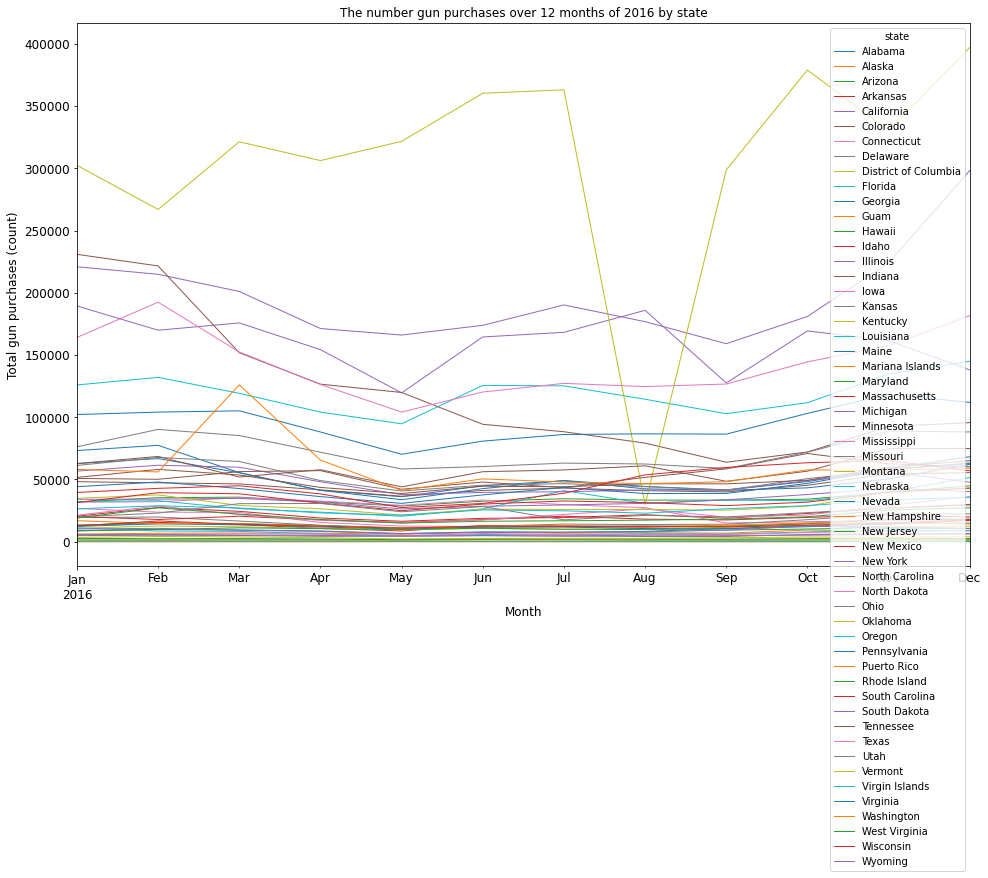

In [55]:
#Visualize the time series of total gun purchases by state over course of 12 months in 2016
from datetime import datetime

ax = totals_by_month.plot(figsize=(16,10), fontsize =12, linewidth = 1)
ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('Total gun purchases (count)', fontsize=12)
ax.set_title('The number gun purchases over 12 months of 2016 by state', fontsize=12)
plt.show()

#### Observations:

Thoughout 2016, top 7 states with overall highest gun purchases experienced fluctations while the remaining majority of states experienced a very stable and stagnant trend through out the year, staying below 75,000 guns at any given month.

Kentucky had by far the largest number of guns in the US in 2016. The state saw an overall steady upward trend, except for a dramatic dip in August, 2016.

Most states started January, 2016 with a high number of guns and reached a low in May and September, 2016.

### Research question 2 (Univariate Descriptive Data Analysis):

I will examine each variable related to ethinicity, such as 'White alone', 'Female persons', 'Black or African American', etc, in the **census_july_2016** data set and answer the following questions:

<ol>
    
<li> What do the frequency distributions of the above-mentioned variables look like? </li>
<li> What are the dispersions as well as central tendencies of those variables? </li>
    
</ol>

I will be using **violin plots** to examine each variable. Violin plots are a combination of a boxplot and a kernel distribution plot so they are a great way to visualize the distribution and density of the data.

In [66]:
#View the list of columns in the census_july_2016 data set.
census_july_2016.columns

Index(['Population estimates, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V2016)',
       'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
       'Two or More Races, percent, July 1, 2016,  (V2016)',
       'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
       'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',
       'Housing units,  July 1, 2016,  (V2016)', 'Building permits, 2016'],
      dtype='object', name='Fact')

In [109]:
#create a list of variables representing different ethnicity percentages from the census_july_2016 set.

eth_var = ['White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V2016)',
       'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
       'Two or More Races, percent, July 1, 2016,  (V2016)',
       'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
       'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)']

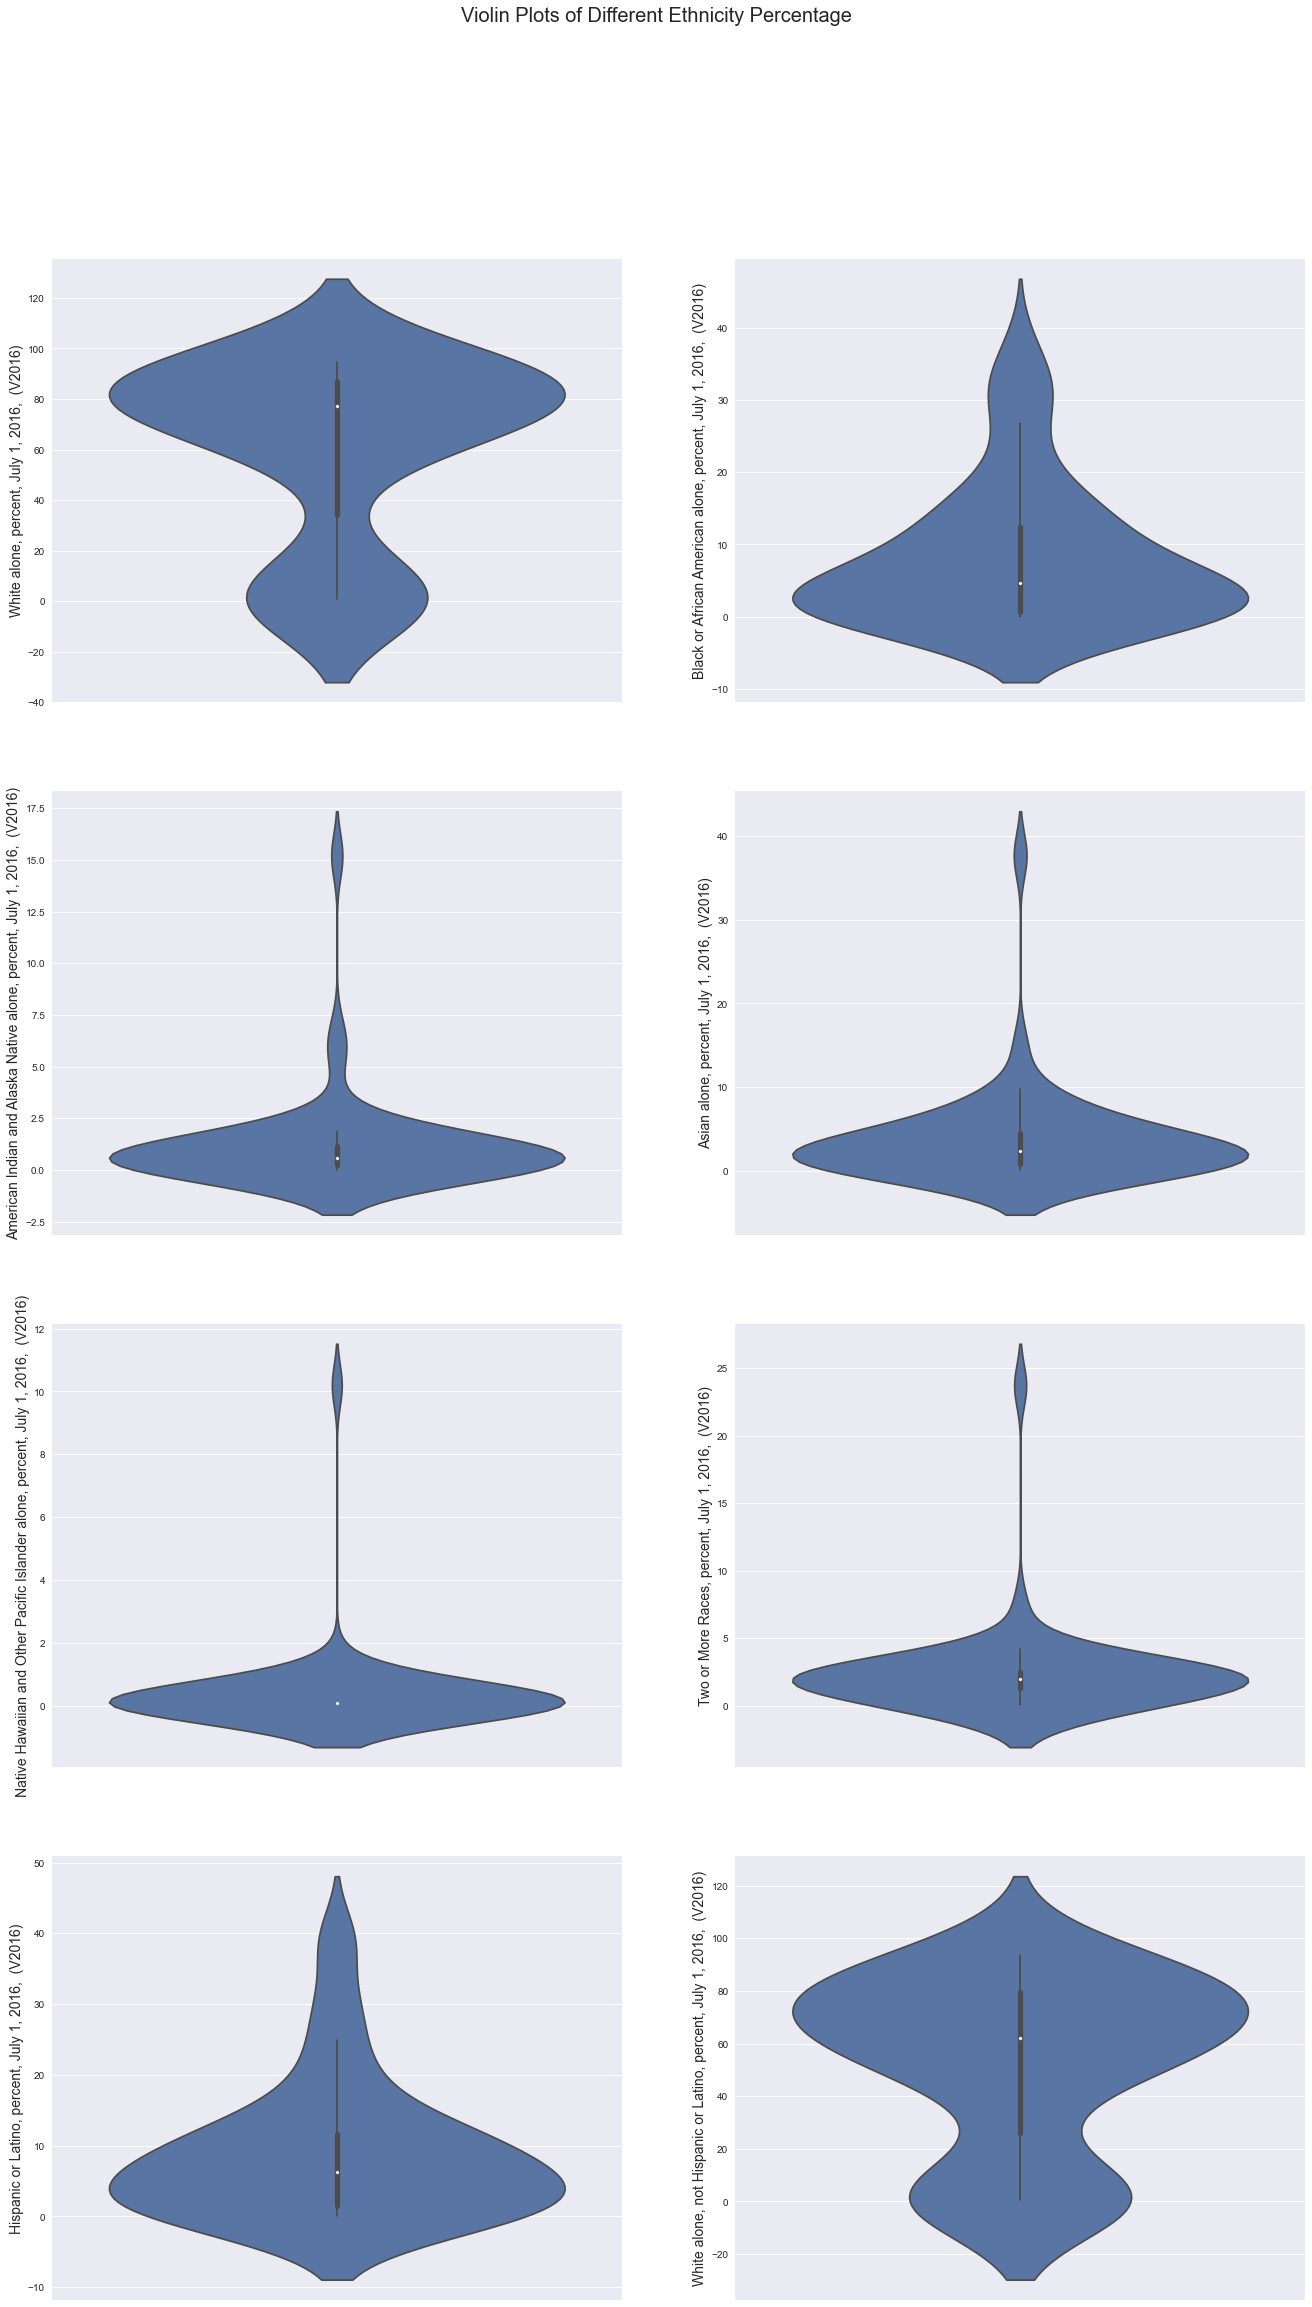

In [120]:
#Visualize those variables with violin plots:

plt.figure(figsize= (20, 35))
plt.suptitle('Violin Plots of Different Ethnicity Percentage', fontsize = 20)
for i in enumerate(eth_var):
    plt.subplot(4,2, i[0] +1)
    ax = sns.violinplot(y = i[1], data = census_july_2016)
    ax.set_ylabel(i[1], fontsize =14)
    


### Observations

- Based on the subplot [0,0], most states are made up of 80% white Americans (shown via the peak of the kernel density distribution) and 80% is also the median percentage of white across the United States. However, there are many states that barely have any white Americans. The data is quite dispersed as the interquartile range depicted in the subplot is approximately 52%.

- Based on the subplot [0,1], most states have around 4% of Black or African Americans. The median percentage of this community is 5%. Except for a few outliers, the distribution of state's Black American percentage is skewed to the right. 

- Based on the subplot [1,0],it is most common that states have only 1% American Indian and Alaska Native as shown via the data's median and mode. However, a small number of states can have as large as 17% Indigenous people. The interquartile range is very narrow which means that the data is narrowly spread.

- Based on the subplot [1,1], the distribution of state's Asian American percentage is right skewed, with most states having around 2-3% Asian Americans. However, the state with a largest Asian American population can have up to 40% of them. The spread of the data is fairly compact.

- Based on the subplot [2,0], most data points locate near 0 which means that the Native Hawaiian presence in most states are very rare. However, a few outlier states have up to 12% of the said ethnicity.The interquartile range is negligible.

- Based on the sublot [2,1], it is most common that states have around 2-3% mixed ethnicity population but a small number of states are made up of approximately 25% mixed ethnicity population. The distribution is right skewed and the interquartile range is very narrow (of around 4%).

- Based on the subplot [3,0], most states have around 5% Hispanic and Latino population and the median hispanic portion through out the US is 7%. The distribution is right skewed as a few states are made up of up to 50% Hispanic population. The interquartile range is around 10%.


To sum up, except for white ethnicity, the distributions for other ethnicities, such as Asian, Black, Native Americans, etc are mostly right-skewed and narrowly spread. The distribution for white population is bimodal with most states have 80% white people and the data is spread out widely through out the US. 

### Research Question 3 (Bivariate Data Analysis):

<ol>
<li> Is age of a population correlated with the number of gun purchases? </li>
<li> Is the ethnicity make-up of a population correlated with the number of gun purchases? </li>
    etc..
    
</ol>


There are many variables related to guns such as long gun or handgun, however, to simplify the analysis, I will only explore the relationship between 'totals' as the *dependent variable* and other census variables as *independent variable*. Therefore I will drop most gun columns except for '*total*'.

As states have different population sizes, to accurately compare gun situation among states, *total guns per capita* would be more relevant than *total guns*. Therefore, I will create a new column called '*total guns per capita*'

In [56]:
#view original columns from the gun_data set

gun_2016.columns

Index(['month', 'state', 'permit', 'handgun', 'long_gun', 'multiple', 'admin',
       'prepawn_handgun', 'prepawn_long_gun', 'redemption_handgun',
       'redemption_long_gun', 'totals', 'Abbreviation', 'text', 'text2',
       'text3', 'text4'],
      dtype='object')

In [57]:
#list out columns I want to drop from the merged_july data set
guncols_to_drop = ['permit', 'handgun', 'long_gun', 'multiple', 'admin',
       'prepawn_handgun', 'prepawn_long_gun', 'redemption_handgun',
       'redemption_long_gun']

merged_july.drop(guncols_to_drop, axis = 1, inplace = True)

In [58]:
#add a column called 'total guns per capita (percentage)'

merged_july['total guns per capita']= merged_july['totals']*100/merged_july['Population estimates, July 1, 2016,  (V2016)']

In [121]:
merged_july.head()

,month,totals,Abbreviation,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Building permits, 2016",total guns per capita
Alabama,2016-07-01,48927,AL,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,2230185,15001,1.006045
Alaska,2016-07-01,6793,AK,741894,7.3,25.2,10.4,47.7,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,310658,1503,0.915629
Arizona,2016-07-01,34496,AZ,6931071,6.3,23.5,16.9,50.3,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,2961003,35578,0.497701
Arkansas,2016-07-01,19378,AR,2988248,6.4,23.6,16.3,50.9,79.4,15.7,1.0,1.6,0.3,2.0,7.3,72.9,1354762,9474,0.648474
California,2016-07-01,190218,CA,39250017,6.3,23.2,13.6,50.3,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,14060525,102350,0.484632


#### Using scatterplots to explore the correlation between each of the census factors and 'total guns per capita'

In [60]:
#View column names of the merged_july data frame
merged_july.columns.to_list()

['month',
 'totals',
 'Abbreviation',
 'Population estimates, July 1, 2016,  (V2016)',
 'Persons under 5 years, percent, July 1, 2016,  (V2016)',
 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 'Female persons, percent,  July 1, 2016,  (V2016)',
 'White alone, percent, July 1, 2016,  (V2016)',
 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 'Asian alone, percent, July 1, 2016,  (V2016)',
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
 'Two or More Races, percent, July 1, 2016,  (V2016)',
 'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
 'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',
 'Housing units,  July 1, 2016,  (V2016)',
 'Building permits, 2016',
 'total guns per capita']

In [61]:
#copy the column names above except 'month' since there is only the month of July, 'totals' and 'population estimates' since they both directly ....\
#to 'total guns per capita', drop 'total guns per capita' because it is the dependent variable.

factors = ['Persons under 5 years, percent, July 1, 2016,  (V2016)',
 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 'Female persons, percent,  July 1, 2016,  (V2016)',
 'White alone, percent, July 1, 2016,  (V2016)',
 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 'Asian alone, percent, July 1, 2016,  (V2016)',
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
 'Two or More Races, percent, July 1, 2016,  (V2016)',
 'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
 'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',
 'Housing units,  July 1, 2016,  (V2016)',
 'Building permits, 2016']

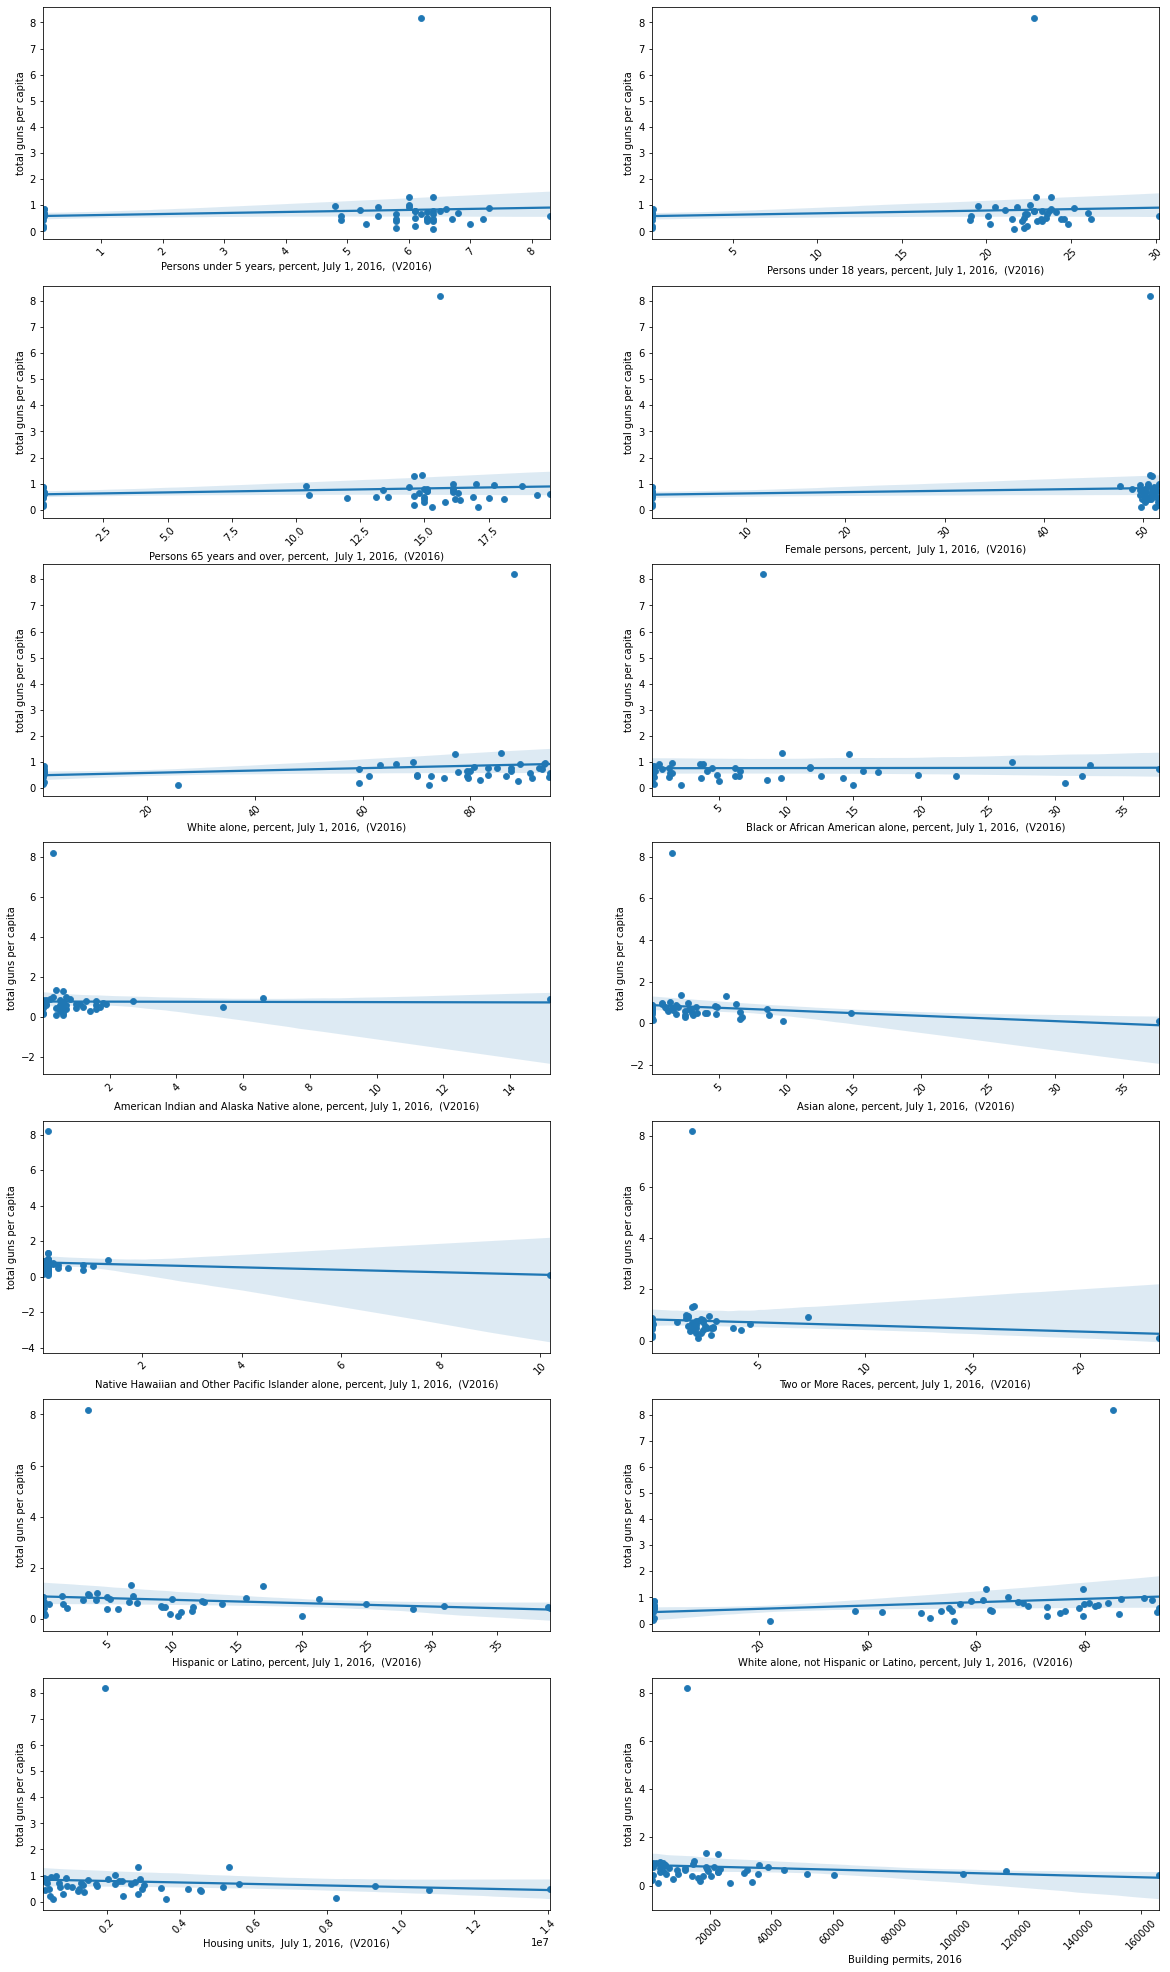

In [62]:
#plotting scatterplots of each of the 'factors' variables and 'total guns per capita' and plot them into the same plot
plt.figure(figsize = (20,35))
for i in enumerate(factors):
    plt.subplot(7,2, i[0]+1)
    sns.scatterplot(x=i[1],y='total guns per capita', data = merged_july)
    sns.regplot(x=i[1], y='total guns per capita', data = merged_july)
    plt.xticks(rotation=45)


**Observation**:

From the above scatterplots, it can be seen that none of the above factors have a strong correlation with '*total guns per capita*'. However, some correlations can still be observed:

<ul>
<li> The percentage of Afican Americans in a state do not seem to correlate with total guns per capita of a state </li>
<li> The percentage of Asian Americans in a state has a light negative correlation as the best fit line in the corresponding subplot trends downward. This means that in a state that has a larger Asian Americans population, the total guns per capita appears to be lower.</li>
<li> Similarly, a state that has a larger white only population tends to observe a higher 'total guns per capita'. </li>
<li> A state with a larger mixed race population or Hispanic/ Latinos, Native Hawaiian/Pacific Islanders seems to have a lower 'total guns per capita'. </li>
 <li> A higher number of building permits or housing units correlate with a lower total guns per capita percentage. </li>
<li> Age-related variables such as 'Under 5 years', 'under 18 years', or 'over 65 years' arguably have a negligible correlation with 'total guns per capita'. </li>
</ul>

Therefore, to sum up, ethnic makeups have a slight correlation with the total guns per capita percentage; housing units and building permits have a slight negative correlation with the total guns per capita rate; age makeups have a negligible correlation with the total guns per capita rate.

It is important to note that these visualizations with scatterplots and observations do not imply causation, but just correlation. In other words, it is not conclusive to say a certain ethnicity caused a higher guns per capita rate.

<a id='conclusions'></a>
## Conclusions

The 'FBI gun data' and 'census data' are the perfect examples of 'dirty' data sets. After cleaning them, only the data belong to the year 2016 was retained as they are most relevant and in a suitable format for data analysis. However, the cleaning narrowed down the 'sample size' and omited a few variables, which cause the analysis to be limited. 

That said, based on my findings based on gun_2016 (containing data of different guns across 12 months of 2016) and merged_july (the merged data set between gun_2016 and census_data but only limited to the month of July), the findings are:

- There are more states with fewer guns than states with a large number of guns. Kentucky, California, Texas, Florida are top states with a high number of total guns, permits, handguns, etc.
- Long guns are less popular than hand guns.
- Except for white ethnicity, the distributions for other ethnicities, such as Asian, Black, Native Americans, etc are mostly right-skewed and narrowly spread. The distribution for white population is bimodal with most states have 80% white people and the data is spread out widely through out the US. 
- Ethnic makeups of population have a slight correlation with the total guns per capita percentage; housing units and building permits have a slight negative correlation with the total guns per capita rate; age makeups of a population have a negligible correlation with the total guns per capita rate.